**Parks**

Ruby Link

In [15]:
import pandas as pd
%matplotlib inline
import geopandas
import matplotlib.pyplot as plt
import pylab
import numpy as np
from itertools import cycle, islice
from matplotlib.colors import LinearSegmentedColormap

park_data = pd.read_csv('parkdata.csv', index_col = '_id')
park_data.head()

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,
1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


In [ ]:
I started by opening the file and viewing the first 5 rows.

In [20]:
###### read the file
parks = pd.read_csv("parkdata.csv", parse_dates=True)

num_parks = parks.groupby("neighborhood").size()
num_parks.sort_values(ascending=False)

neighborhood
East Liberty                 12
Central Business District    10
Beechview                     8
Point Breeze                  7
South Side Slopes             7
                             ..
Homewood West                 1
Oakwood                       1
Middle Hill                   1
North Oakland                 1
Windgap                       1
Length: 73, dtype: int64

Above is a list of neighborhoods that have the most parks in desending order. 

In [17]:
num_parks = num_parks.reset_index()
num_parks.columns = ["neighborhood", "parks_count"]

# Now perform the merge
neighborhoods = geopandas.read_file("Neighborhoods_.shp")
parks_map = neighborhoods.merge(num_parks, how="left", left_on="hood", right_on="neighborhood")

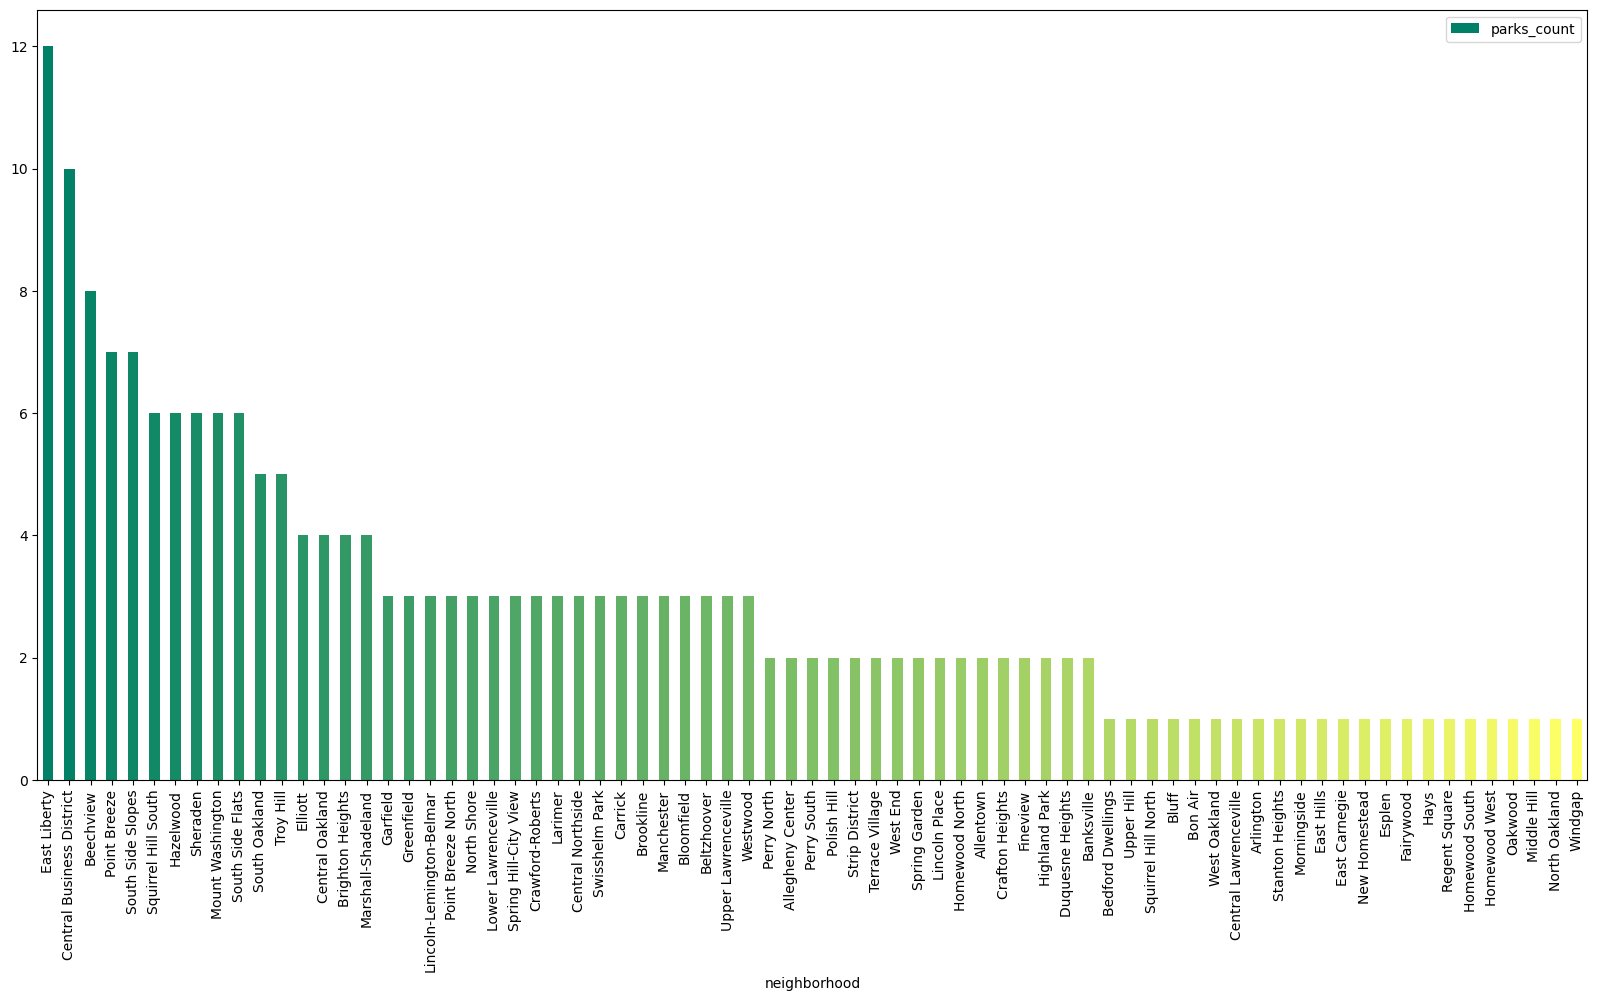

In [18]:
num_parks_sorted = num_parks.sort_values(by='parks_count', ascending = False)
colors=plt.cm.summer(np.linspace(0, 1, len(num_parks_sorted)))
pylab.figure(figsize = (20, 10))
ax = pylab.gca()
num_parks_sorted.plot(kind = 'bar', x = 'neighborhood', y = 'parks_count', ax = ax, color=colors)
plt.show()

This is a bar graph that shows the neighborhoods with the most parks to the ones with the least. 

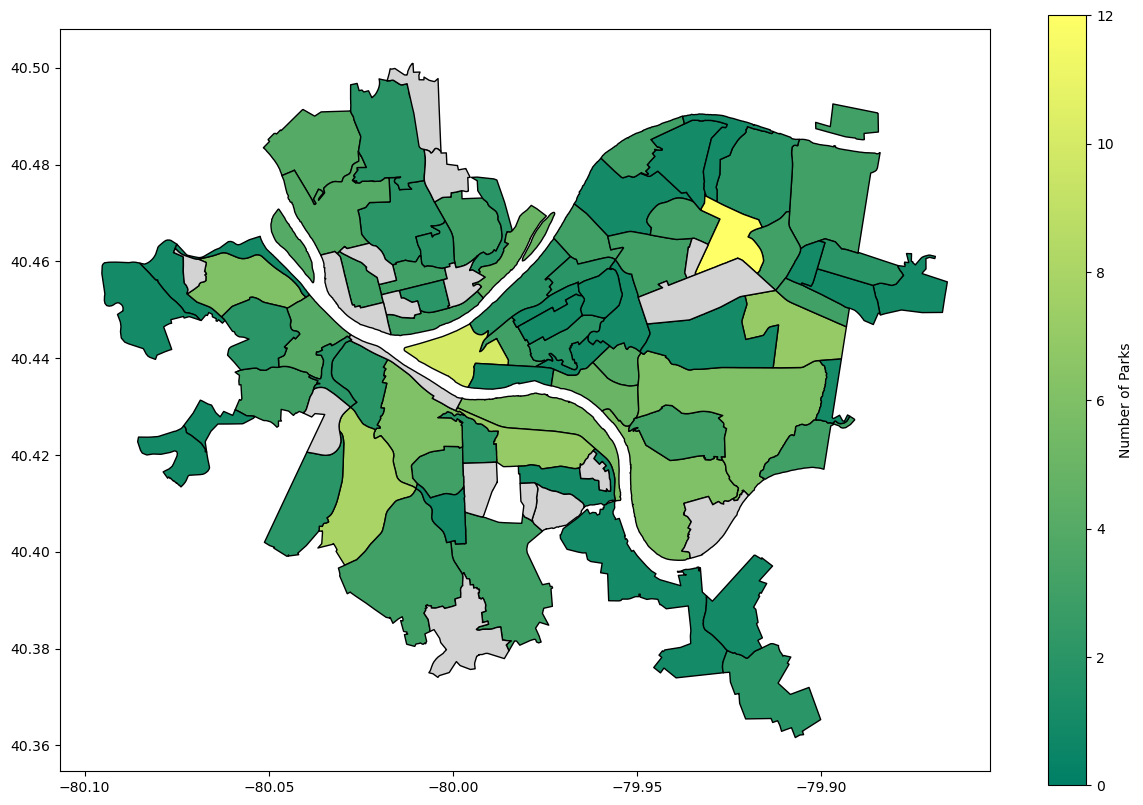

In [19]:
parks_map.plot(column = 'parks_count', # set the data to be used for coloring
              cmap = 'summer', # chose summer as the color palette
              edgecolor = 'black', # outlines districts in white
              legend = True, # show the legend
              legend_kwds = {'label': 'Number of Parks'}, # label the legend
              figsize = (15, 10), # set the size
              missing_kwds = {'color': 'lightgrey'}, # set districts w out data as grey
              vmin = 0)
plt.show()

Here is a map showing the number of parks in the neighborhoods. The lighter green the region is,
the more parks it has. 